In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df1=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df4=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df5=pd.read_csv("D:\ResaleFlatPrices\Resale flat prices based on registration date from Jan-2017 onwards.csv")


In [91]:
df = pd.concat([df1, df2,df3,df4,df5], ignore_index=True)

In [94]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941006 entries, 0 to 941005
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                941006 non-null  object 
 1   town                 941006 non-null  object 
 2   flat_type            941006 non-null  object 
 3   block                941006 non-null  object 
 4   street_name          941006 non-null  object 
 5   storey_range         941006 non-null  object 
 6   floor_area_sqm       941006 non-null  float64
 7   flat_model           941006 non-null  object 
 8   lease_commence_date  941006 non-null  int64  
 9   resale_price         941006 non-null  float64
 10  remaining_lease      231956 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 79.0+ MB


In [6]:

for i in df.columns:
  print(f"{i}:{df[i].nunique()}")

month:419
town:27
flat_type:8
block:2729
street_name:588
storey_range:25
floor_area_sqm:218
flat_model:34
lease_commence_date:56
resale_price:9735
remaining_lease:730


In [7]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [8]:
df.month.value_counts

<bound method IndexOpsMixin.value_counts of 0         1990-01
1         1990-01
2         1990-01
3         1990-01
4         1990-01
           ...   
941001    2024-11
941002    2024-11
941003    2024-11
941004    2024-11
941005    2024-11
Name: month, Length: 941006, dtype: object>

In [9]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [10]:
df=df.drop_duplicates()

In [11]:
df.drop_duplicates().shape

(939101, 11)

In [12]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707463
dtype: int64

In [13]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [14]:
df["block"] = pd.to_numeric(df["block"], errors='coerce') 
df["floor_area_sqm"] = pd.to_numeric(df["floor_area_sqm"], errors='coerce')
df['month'] = pd.to_datetime(df['month'])

In [15]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [16]:
df.town.value_counts()

town
TAMPINES           80790
YISHUN             70828
JURONG WEST        67466
BEDOK              67128
WOODLANDS          66395
ANG MO KIO         52486
HOUGANG            51381
BUKIT BATOK        45200
CHOA CHU KANG      38924
BUKIT MERAH        34800
SENGKANG           33508
PASIR RIS          33494
TOA PAYOH          31860
QUEENSTOWN         29072
GEYLANG            28478
CLEMENTI           28249
BUKIT PANJANG      28081
KALLANG/WHAMPOA    27629
JURONG EAST        25019
SERANGOON          23006
PUNGGOL            21638
BISHAN             21438
SEMBAWANG          14311
MARINE PARADE       8086
CENTRAL AREA        7223
BUKIT TIMAH         2548
LIM CHU KANG          63
Name: count, dtype: int64

In [17]:
df.shape

(939101, 11)

In [18]:
df.flat_type.value_counts()

flat_type
4 ROOM              357689
3 ROOM              298440
5 ROOM              198465
EXECUTIVE            70504
2 ROOM               12179
1 ROOM                1279
MULTI GENERATION       279
MULTI-GENERATION       266
Name: count, dtype: int64

In [19]:

df["flat_type"]=df["flat_type"].replace({"MULTI GENERATION" :"MULTI-GENERATION"})


In [20]:
df["flat_model"]=df["flat_model"].replace({"NEW GENERATION":"New Generation"})

In [21]:
df['storey_avg'] = df['storey_range'].str.split(' TO ').apply(lambda x: (int(x[0]) + int(x[1])) / 2)


In [22]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                         float64
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
storey_avg                    float64
dtype: object

In [23]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0


In [24]:
df['remaining_lease'].unique()

array([nan, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58,
       94, 71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55,
       57, 93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49,
       48, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 mont

In [25]:
def convert_to_months(age):
    if pd.isnull(age):  # Handle NaN
        return np.nan
    if isinstance(age, (int, float)):  # Already numeric
        return age
    if isinstance(age, str):  # Convert "X years Y months"
        parts = age.split()
        years = int(parts[0]) if "years" in parts else 0
        months = int(parts[-2]) if "months" in parts else 0
        return years * 12 + months
    return np.nan

# Apply the conversion to the data
converted_data = np.array([convert_to_months(item) for item in df['remaining_lease']])

# Convert to a DataFrame while ensuring valid indices
# Reset index to handle NaN properly

df['remaining_lease_months']=converted_data


In [26]:
current_year = pd.Timestamp.now().year
df['remaining_lease_month'] = (99 * 12) - ((current_year - df['lease_commence_date']) * 12)

In [27]:
#np.where(condition, value_if_true, value_if_false)

df['filled_release_months'] = np.where(
    pd.isna(df['remaining_lease_months']),  # Check for NaN
     df['remaining_lease_month'],           # Replace NaN with calculated values
     df['remaining_lease_months']           # Keep existing values
 )

In [28]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg,remaining_lease_months,remaining_lease_month,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0,NaN,624,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0,NaN,624,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0,NaN,624,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0,NaN,624,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0,NaN,612,612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,YISHUN,5 ROOM,NaN,YISHUN ST 31,07 TO 09,112.0,Improved,2015,700000.0,90 years 01 month,8.0,1080.0,1080,1080.0
941002,2024-11-01,YISHUN,5 ROOM,NaN,YISHUN ST 51,10 TO 12,113.0,Improved,2017,720000.0,91 years 10 months,11.0,1102.0,1104,1102.0
941003,2024-11-01,YISHUN,5 ROOM,850.0,YISHUN ST 81,01 TO 03,122.0,Improved,1988,670000.0,62 years 09 months,2.0,753.0,756,753.0
941004,2024-11-01,YISHUN,EXECUTIVE,405.0,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,855500.0,62 years 10 months,5.0,754.0,756,754.0


In [29]:
df.isna().sum()

month                          0
town                           0
flat_type                      0
block                     129892
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
remaining_lease           707463
storey_avg                     0
remaining_lease_months    707463
remaining_lease_month          0
filled_release_months          0
dtype: int64

In [30]:
df.lease_commence_date.unique

<bound method Series.unique of 0         1977
1         1977
2         1977
3         1977
4         1976
          ... 
941001    2015
941002    2017
941003    1988
941004    1988
941005    1987
Name: lease_commence_date, Length: 939101, dtype: int64>

In [31]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg,remaining_lease_months,remaining_lease_month,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0,NaN,624,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0,NaN,624,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0,NaN,624,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0,NaN,624,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0,NaN,612,612.0


In [32]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg,remaining_lease_months,remaining_lease_month,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0,NaN,624,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0,NaN,624,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0,NaN,624,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0,NaN,624,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0,NaN,612,612.0


In [33]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
month,939101,2006-11-25 01:49:05.821163520,1990-01-01 00:00:00,1999-02-01 00:00:00,2005-07-01 00:00:00,2014-10-01 00:00:00,2024-11-01 00:00:00,NaN
block,809209.0,337.891836,1.0,121.0,280.0,526.0,980.0,254.045984
floor_area_sqm,939101.0,95.710388,28.0,73.0,93.0,113.0,366.7,25.799126
lease_commence_date,939101.0,1988.425379,1966.0,1981.0,1986.0,1996.0,2021.0,10.805845
resale_price,939101.0,325345.548984,5000.0,195000.0,300000.0,422000.0,1588000.0,174627.863574
storey_avg,939101.0,7.704709,2.0,5.0,8.0,11.0,50.0,4.841499
remaining_lease_months,231638.0,762.40799,48.0,679.0,824.0,1001.0,1173.0,338.17799
remaining_lease_month,939101.0,761.10455,492.0,672.0,732.0,852.0,1152.0,129.67014
filled_release_months,939101.0,741.012302,48.0,660.0,732.0,852.0,1173.0,190.187838


In [34]:
# # Drop unnecessary columns
df = df.drop(['block', 'street_name','remaining_lease','remaining_lease_months','remaining_lease_month'], axis=1)

# # Handle missing values in the target variable
# df = df.dropna(subset=['resale_price'])



In [35]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,11.0,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,5.0,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,11.0,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,8.0,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,47200.0,5.0,612.0


In [36]:
df.isnull().sum()

month                    0
town                     0
flat_type                0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
storey_avg               0
filled_release_months    0
dtype: int64

In [37]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [38]:
df12=df.copy()

In [39]:
df = df.drop(['storey_range'], axis=1)

In [40]:
df12

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,11.0,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,5.0,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,11.0,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,8.0,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,47200.0,5.0,612.0
...,...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,YISHUN,5 ROOM,07 TO 09,112.0,Improved,2015,700000.0,8.0,1080.0
941002,2024-11-01,YISHUN,5 ROOM,10 TO 12,113.0,Improved,2017,720000.0,11.0,1102.0
941003,2024-11-01,YISHUN,5 ROOM,01 TO 03,122.0,Improved,1988,670000.0,2.0,753.0
941004,2024-11-01,YISHUN,EXECUTIVE,04 TO 06,148.0,Maisonette,1988,855500.0,5.0,754.0


In [41]:
df12.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,storey_avg,filled_release_months
count,939101,939101.000000,939101.000000,9.391010e+05,939101.000000,939101.000000
mean,2006-11-25 01:49:05.821163520,95.710388,1988.425379,3.253455e+05,7.704709,741.012302
min,1990-01-01 00:00:00,28.000000,1966.000000,5.000000e+03,2.000000,48.000000
25%,1999-02-01 00:00:00,73.000000,1981.000000,1.950000e+05,5.000000,660.000000
50%,2005-07-01 00:00:00,93.000000,1986.000000,3.000000e+05,8.000000,732.000000
75%,2014-10-01 00:00:00,113.000000,1996.000000,4.220000e+05,11.000000,852.000000
max,2024-11-01 00:00:00,366.700000,2021.000000,1.588000e+06,50.000000,1173.000000
std,NaN,25.799126,10.805845,1.746279e+05,4.841499,190.187838


In [42]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [43]:
town_enode = df.groupby("town")['resale_price'].mean().sort_values(ascending=True)
town_enode 




town
LIM CHU KANG        64347.619048
ANG MO KIO         261674.539557
YISHUN             275107.738556
BEDOK              279059.947023
GEYLANG            279775.743861
JURONG EAST        285996.466551
BUKIT BATOK        286082.039868
CLEMENTI           289143.185060
JURONG WEST        298234.329537
QUEENSTOWN         306063.993892
TOA PAYOH          311646.565322
WOODLANDS          318035.493715
HOUGANG            324477.549074
SERANGOON          332169.584234
KALLANG/WHAMPOA    333565.732349
BUKIT PANJANG      338264.500372
TAMPINES           340076.956123
MARINE PARADE      342203.618447
CENTRAL AREA       349102.360742
CHOA CHU KANG      351810.504029
BUKIT MERAH        360652.365698
SEMBAWANG          392404.571929
PASIR RIS          409298.475655
BISHAN             426735.670029
SENGKANG           445668.809811
BUKIT TIMAH        459587.480330
PUNGGOL            493403.403660
Name: resale_price, dtype: float64

In [44]:
# Convert to a dictionary with sequential indices and only town names
result = {i: town for i, town in enumerate(town_enode.index)}
reverse_mapresult = {v: k for k, v in result.items()}
reverse_mapresult




{'LIM CHU KANG': 0,
 'ANG MO KIO': 1,
 'YISHUN': 2,
 'BEDOK': 3,
 'GEYLANG': 4,
 'JURONG EAST': 5,
 'BUKIT BATOK': 6,
 'CLEMENTI': 7,
 'JURONG WEST': 8,
 'QUEENSTOWN': 9,
 'TOA PAYOH': 10,
 'WOODLANDS': 11,
 'HOUGANG': 12,
 'SERANGOON': 13,
 'KALLANG/WHAMPOA': 14,
 'BUKIT PANJANG': 15,
 'TAMPINES': 16,
 'MARINE PARADE': 17,
 'CENTRAL AREA': 18,
 'CHOA CHU KANG': 19,
 'BUKIT MERAH': 20,
 'SEMBAWANG': 21,
 'PASIR RIS': 22,
 'BISHAN': 23,
 'SENGKANG': 24,
 'BUKIT TIMAH': 25,
 'PUNGGOL': 26}

In [45]:

# Map town names to their corresponding numbers
df['town'] = df['town'].map(reverse_mapresult)


In [46]:
df

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,1,1 ROOM,31.0,IMPROVED,1977,9000.0,11.0,624.0
1,1990-01-01,1,1 ROOM,31.0,IMPROVED,1977,6000.0,5.0,624.0
2,1990-01-01,1,1 ROOM,31.0,IMPROVED,1977,8000.0,11.0,624.0
3,1990-01-01,1,1 ROOM,31.0,IMPROVED,1977,6000.0,8.0,624.0
4,1990-01-01,1,3 ROOM,73.0,New Generation,1976,47200.0,5.0,612.0
...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,2,5 ROOM,112.0,Improved,2015,700000.0,8.0,1080.0
941002,2024-11-01,2,5 ROOM,113.0,Improved,2017,720000.0,11.0,1102.0
941003,2024-11-01,2,5 ROOM,122.0,Improved,1988,670000.0,2.0,753.0
941004,2024-11-01,2,EXECUTIVE,148.0,Maisonette,1988,855500.0,5.0,754.0


In [47]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [48]:
flat_enode = df.groupby("flat_type")['resale_price'].mean().sort_values(ascending=True)
flat_enode 


flat_type
1 ROOM               67964.326818
2 ROOM              164201.297643
3 ROOM              205386.868143
4 ROOM              332816.166095
5 ROOM              435368.808329
EXECUTIVE           516413.840438
MULTI-GENERATION    533111.750459
Name: resale_price, dtype: float64

In [49]:
result1 = {i: town for i, town in enumerate(flat_enode.index)}
reverse_mapresult1 = {v: k for k, v in result1.items()}
df['flat_type'] = df['flat_type'].map(reverse_mapresult1)


In [50]:
df['flat_model'].unique()

array(['IMPROVED', 'New Generation', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'Model A', 'Standard',
       'Apartment', 'Simplified', 'Model A-Maisonette', 'Maisonette',
       'Multi Generation', 'Adjoined flat', 'Premium Apartment',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', '2-room',
       'Model A2', 'Type S1', 'Type S2', 'DBSS', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [51]:
flat_model_enode = df.groupby("flat_model")['resale_price'].mean().sort_values(ascending=True)
result2 = {i: town for i, town in enumerate(flat_model_enode.index)}
reverse_mapresult2 = {v: k for k, v in result2.items()}

In [52]:
flat_model_enode = df.groupby("flat_model")['resale_price'].mean().sort_values(ascending=True)
result2 = {i: town for i, town in enumerate(flat_model_enode.index)}
reverse_mapresult2 = {v: k for k, v in result2.items()}
df['flat_model'] = df['flat_model'].map(reverse_mapresult2)

In [53]:

# # # Encode categorical columns
# df['town'] = df['town'].astype('category').cat.codes
# df['flat_type'] = df['flat_type'].astype('category').cat.codes
# df['flat_model'] = df['flat_model'].astype('category').cat.codes

In [54]:
df.describe()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
count,939101,939101.000000,939101.000000,939101.000000,939101.000000,939101.000000,9.391010e+05,939101.000000,939101.000000
mean,2006-11-25 01:49:05.821163520,11.323695,3.015412,95.710388,9.699107,1988.425379,3.253455e+05,7.704709,741.012302
min,1990-01-01 00:00:00,0.000000,0.000000,28.000000,0.000000,1966.000000,5.000000e+03,2.000000,48.000000
25%,1999-02-01 00:00:00,5.000000,2.000000,73.000000,4.000000,1981.000000,1.950000e+05,5.000000,660.000000
50%,2005-07-01 00:00:00,11.000000,3.000000,93.000000,13.000000,1986.000000,3.000000e+05,8.000000,732.000000
75%,2014-10-01 00:00:00,16.000000,4.000000,113.000000,14.000000,1996.000000,4.220000e+05,11.000000,852.000000
max,2024-11-01 00:00:00,26.000000,6.000000,366.700000,32.000000,2021.000000,1.588000e+06,50.000000,1173.000000
std,NaN,7.167345,0.947920,25.799126,5.969422,10.805845,1.746279e+05,4.841499,190.187838


#Outlier

In [55]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,1,0,31.0,4,1977,9000.0,11.0,624.0
1,1990-01-01,1,0,31.0,4,1977,6000.0,5.0,624.0
2,1990-01-01,1,0,31.0,4,1977,8000.0,11.0,624.0
3,1990-01-01,1,0,31.0,4,1977,6000.0,8.0,624.0
4,1990-01-01,1,2,73.0,3,1976,47200.0,5.0,612.0


In [56]:
sorted(df['storey_avg'].unique())

[np.float64(2.0),
 np.float64(3.0),
 np.float64(5.0),
 np.float64(8.0),
 np.float64(11.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(20.0),
 np.float64(23.0),
 np.float64(26.0),
 np.float64(28.0),
 np.float64(29.0),
 np.float64(32.0),
 np.float64(33.0),
 np.float64(35.0),
 np.float64(38.0),
 np.float64(41.0),
 np.float64(44.0),
 np.float64(47.0),
 np.float64(50.0)]

In [57]:
sorted(df12['storey_range'].unique())

['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [58]:
df.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'storey_avg',
       'filled_release_months'],
      dtype='object')

In [59]:

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [60]:
outlier(df, "floor_area_sqm")
outlier(df, "resale_price")


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    sns.boxplot(y=df)
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    # Create a boxplot for the specified column
    sns.boxplot(y=df[column])

    # Set the title for the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

    # Show the plot
    plt.show()

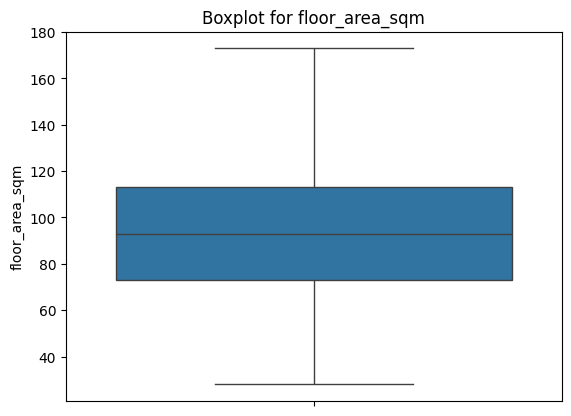

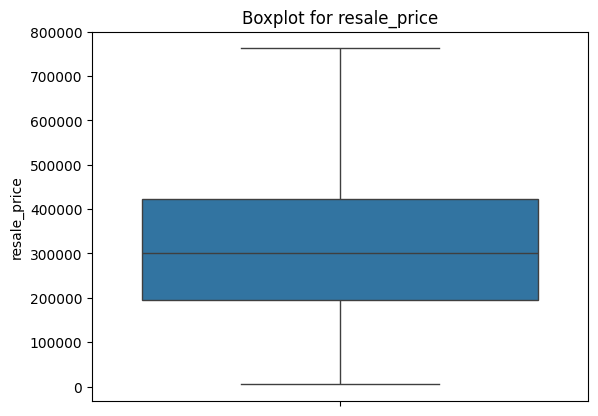

In [62]:
box(df, "floor_area_sqm")
box(df, 'resale_price')  # For example, to plot the boxplot of 'quantity tons'


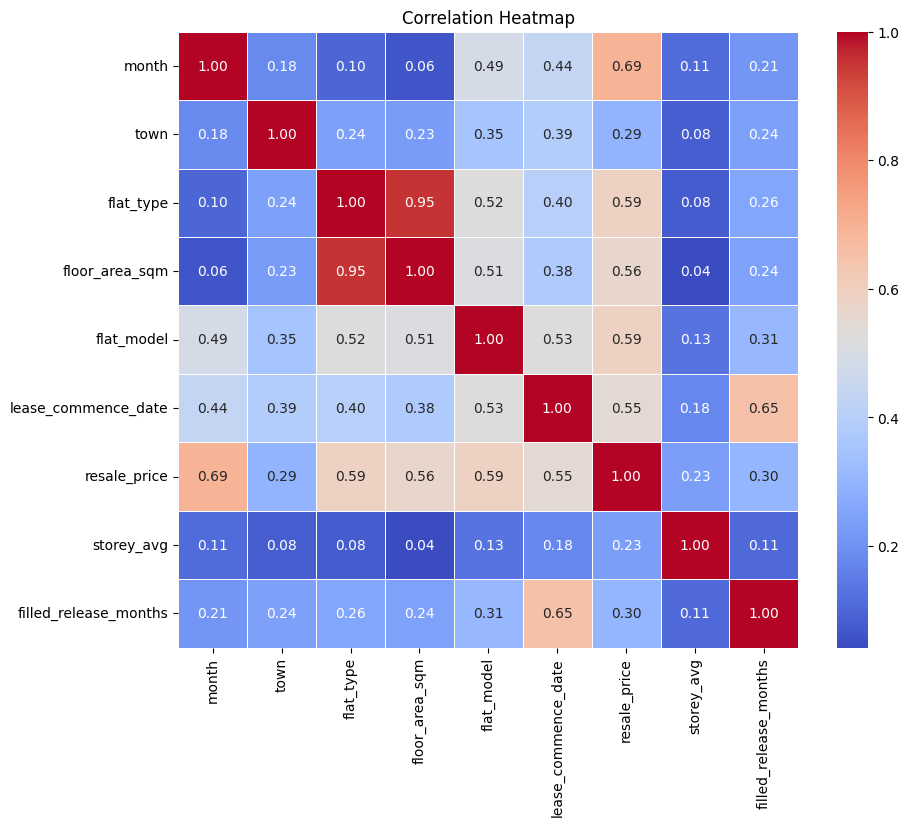

In [63]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Title and Show Plot
plt.title("Correlation Heatmap")
plt.show()

In [64]:
df11=df.copy()
df11

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,1,0,31.0,4,1977,9000.0,11.0,624.0
1,1990-01-01,1,0,31.0,4,1977,6000.0,5.0,624.0
2,1990-01-01,1,0,31.0,4,1977,8000.0,11.0,624.0
3,1990-01-01,1,0,31.0,4,1977,6000.0,8.0,624.0
4,1990-01-01,1,2,73.0,3,1976,47200.0,5.0,612.0
...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,2,4,112.0,14,2015,700000.0,8.0,1080.0
941002,2024-11-01,2,4,113.0,14,2017,720000.0,11.0,1102.0
941003,2024-11-01,2,4,122.0,14,1988,670000.0,2.0,753.0
941004,2024-11-01,2,5,148.0,23,1988,762500.0,5.0,754.0


In [65]:
df11.describe()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
count,939101,939101.000000,939101.000000,939101.000000,939101.000000,939101.000000,939101.000000,939101.000000,939101.000000
mean,2006-11-25 01:49:05.821163520,11.323695,3.015412,95.682424,9.699107,1988.425379,322759.748423,7.704709,741.012302
min,1990-01-01 00:00:00,0.000000,0.000000,28.000000,0.000000,1966.000000,5000.000000,2.000000,48.000000
25%,1999-02-01 00:00:00,5.000000,2.000000,73.000000,4.000000,1981.000000,195000.000000,5.000000,660.000000
50%,2005-07-01 00:00:00,11.000000,3.000000,93.000000,13.000000,1986.000000,300000.000000,8.000000,732.000000
75%,2014-10-01 00:00:00,16.000000,4.000000,113.000000,14.000000,1996.000000,422000.000000,11.000000,852.000000
max,2024-11-01 00:00:00,26.000000,6.000000,173.000000,32.000000,2021.000000,762500.000000,50.000000,1173.000000
std,NaN,7.167345,0.947920,25.699832,5.969422,10.805845,166353.214862,4.841499,190.187838


In [66]:
df11=df11.drop_duplicates()

In [67]:
df11.isna().sum()

month                    0
town                     0
flat_type                0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
storey_avg               0
filled_release_months    0
dtype: int64

In [68]:
df11.dtypes

month                    datetime64[ns]
town                              int64
flat_type                         int64
floor_area_sqm                  float64
flat_model                        int64
lease_commence_date               int64
resale_price                    float64
storey_avg                      float64
filled_release_months           float64
dtype: object

In [69]:

df11['year'] = df11['month'].dt.year
df11['month'] = df11['month'].dt.month

C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_15584\680787323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['year'] = df11['month'].dt.year
C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_15584\680787323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['month'] = df11['month'].dt.month


In [70]:
df11

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months,year
0,1,1,0,31.0,4,1977,9000.0,11.0,624.0,1990
1,1,1,0,31.0,4,1977,6000.0,5.0,624.0,1990
2,1,1,0,31.0,4,1977,8000.0,11.0,624.0,1990
3,1,1,0,31.0,4,1977,6000.0,8.0,624.0,1990
4,1,1,2,73.0,3,1976,47200.0,5.0,612.0,1990
...,...,...,...,...,...,...,...,...,...,...
941001,11,2,4,112.0,14,2015,700000.0,8.0,1080.0,2024
941002,11,2,4,113.0,14,2017,720000.0,11.0,1102.0,2024
941003,11,2,4,122.0,14,1988,670000.0,2.0,753.0,2024
941004,11,2,5,148.0,23,1988,762500.0,5.0,754.0,2024


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [72]:
X = df11.drop(columns=['resale_price'])
y = df11.loc[:, 'resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((697208, 9), (232403, 9), (697208,), (232403,))

In [73]:
# #standardize the features of a dataset
# encoder = StandardScaler()

# encoder.fit_transform(X)

In [74]:
LR = LinearRegression()

# fitting the model: 
LR.fit(X_train,y_train)

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 5981267666.005159
Mean Absolute Error: 58772.04088868301
Root Mean Squared Error: 77338.65570337488
0.782708399157161


In [75]:
DTR = DecisionTreeRegressor()

# fitting the model: 
DTR.fit(X_train,y_train)

y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 1056971474.6562551
Mean Absolute Error: 21199.080435405314
Root Mean Squared Error: 32511.09771533799
0.9616016141396545


In [76]:
from sklearn.model_selection import cross_val_score

for depth in range(1,30):
  DTR = DecisionTreeRegressor(max_depth = depth)
  DTR.fit(X_train, y_train)
  train_score = DTR.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(DTR, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.4308978354010049, Cross-ValScore: 0.43088187281149315
Depth - 2, TrainScore: 0.651959324494424, Cross-ValScore: 0.6519487994235967
Depth - 3, TrainScore: 0.7364745788626432, Cross-ValScore: 0.7364601446379091
Depth - 4, TrainScore: 0.8048409785850392, Cross-ValScore: 0.8048255606985565
Depth - 5, TrainScore: 0.8359643926002437, Cross-ValScore: 0.8358610632110295
Depth - 6, TrainScore: 0.8580160682175115, Cross-ValScore: 0.8576634579228525


KeyboardInterrupt: 

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Train the model
model = DecisionTreeRegressor(random_state=42, max_depth=22)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Compute R-squared on the test set
test_score = r2_score(y_test, y_pred_test)

# Compute R-squared on the training set
train_score = model.score(X_train, y_train)

# Output the results
print("Test R-squared score:", test_score)
print("Train R-squared score:", train_score)


Test R-squared score: 0.96558486168496
Train R-squared score: 0.9895269442413852


In [554]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model1 = RandomForestRegressor(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model1, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.7282791777701513
N: 20, Cross-Val Score: 0.740724613695154
N: 50, Cross-Val Score: 0.7470184359683999
N: 100, Cross-Val Score: 0.7430061082831692
N: 200, Cross-Val Score: 0.7461389785652234
N: 500, Cross-Val Score: 0.7456025883742006
N: 1000, Cross-Val Score: 0.7454855875556916


In [557]:

model1 = RandomForestRegressor(n_estimators=50, max_depth=3, max_features="sqrt")
model1.fit(X_train, y_train)
print(f"Test data accuracy: {model1.score(X_test, y_test)}")


Test data accuracy: 0.7513720971812007


In [558]:
from xgboost import  XGBRegressor

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5,0.7,0.71,0.711,0.712,0.713,0.714,0.72 ,1]:
  model2 =  XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model2, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.15552199399913066
Lambda: 0.002, Cross-Val Score: 0.2834878030467596
Lambda: 0.005, Cross-Val Score: 0.5488120068375245
Lambda: 0.006, Cross-Val Score: 0.6085961227824459
Lambda: 0.007, Cross-Val Score: 0.6575555729374681
Lambda: 0.008, Cross-Val Score: 0.6980172232846317
Lambda: 0.009, Cross-Val Score: 0.7315937919474679
Lambda: 0.01, Cross-Val Score: 0.7596603777542006
Lambda: 0.011, Cross-Val Score: 0.7830383460772846
Lambda: 0.012, Cross-Val Score: 0.8025072470763097
Lambda: 0.013, Cross-Val Score: 0.8188357225060263
Lambda: 0.014, Cross-Val Score: 0.8326550931694715
Lambda: 0.015, Cross-Val Score: 0.844384988302642
Lambda: 0.016, Cross-Val Score: 0.8545390972251719
Lambda: 0.017, Cross-Val Score: 0.8631771934254514
Lambda: 0.018, Cross-Val Score: 0.8706458841907928
Lambda: 0.019, Cross-Val Score: 0.8769559207001058
Lambda: 0.02, Cross-Val Score: 0.8826712648944799
Lambda: 0.05, Cross-Val Score: 0.9436249751817967
Lambda: 0.1, Cross-Val Score: 0.96

In [79]:
from xgboost import  XGBRegressor
model2 = XGBRegressor(learning_rate = 0.7)
model2.fit(X_train, y_train)
cross_score = np.mean(cross_val_score(model2, X_train, y_train, cv = 10))
print(f"Test data accuracy : {model2.score(X_test, y_test)}, Cross-Val Score: {cross_score}")

Test data accuracy : 0.9763981824196492, Cross-Val Score: 0.9760895733896808


                 Feature  Importance
8                   year    0.405507
2              flat_type    0.242596
3         floor_area_sqm    0.192900
4             flat_model    0.051843
6             storey_avg    0.034278
5    lease_commence_date    0.032109
1                   town    0.031772
0                  month    0.004823
7  filled_release_months    0.004173


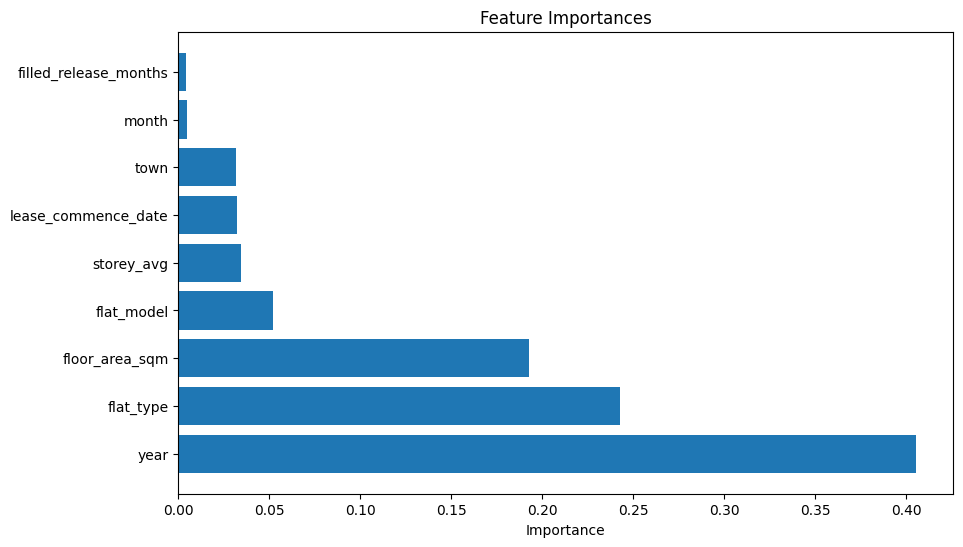

In [80]:
# Get feature importances
feature_importances = model2.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [81]:
#Save the regression model by using pickle

import pickle

# Save the trained model to a file
with open('trained_Regression_model.pkl', 'wb') as file:
    pickle.dump(model2, file)

In [82]:
import pickle

# Save the trained model to a file
with open('trained_Regression_df_model.pkl', 'wb') as file:
    pickle.dump(df12, file)

In [83]:
model2.predict(X)

array([  8467.291,  13975.241,   8467.291, ..., 661177.8  , 779980.06 ,
       770595.6  ], dtype=float32)

In [84]:
# 1. Predict values
predictions = model2.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison


,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,storey_avg,filled_release_months,year,Original,Predicted
70625,6,3,3,92.0,3,1980,2.0,660.0,1994,155000.0,159834.625000
422155,11,2,3,88.0,6,1988,11.0,756.0,2003,175000.0,176870.093750
861614,12,17,4,117.0,7,1977,11.0,648.0,2021,762500.0,732973.937500
49124,8,16,2,69.0,4,1985,2.0,720.0,1993,58000.0,78801.226562
323404,1,8,2,67.0,14,1971,5.0,552.0,2001,94000.0,103064.460938
...,...,...,...,...,...,...,...,...,...,...,...
743970,11,4,2,64.0,7,1968,11.0,516.0,2014,305000.0,319357.406250
717694,3,11,4,122.0,14,1998,2.0,876.0,2013,451000.0,459385.125000
687951,9,6,2,73.0,13,1986,8.0,68.0,2016,285000.0,295594.718750
834714,1,12,3,92.0,18,2016,11.0,1131.0,2021,525000.0,553162.250000


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'Original' contains the true values and 'Predicted' contains the model's predictions
y_true = df_comparison['Original']
y_pred = df_comparison['Predicted']

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MAE: 18148.424552528548
MSE: 649674390.5642625
RMSE: 25488.711041640818
R2: 0.9763981824196492


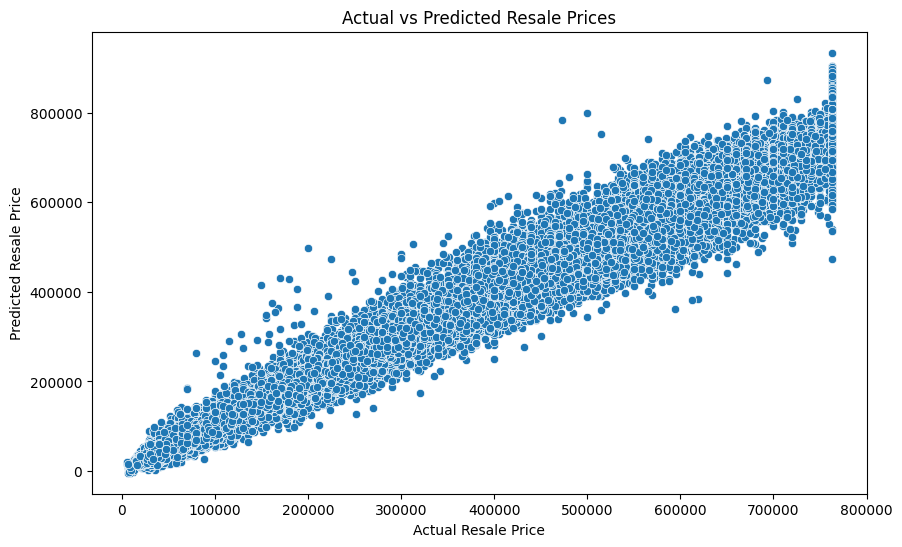

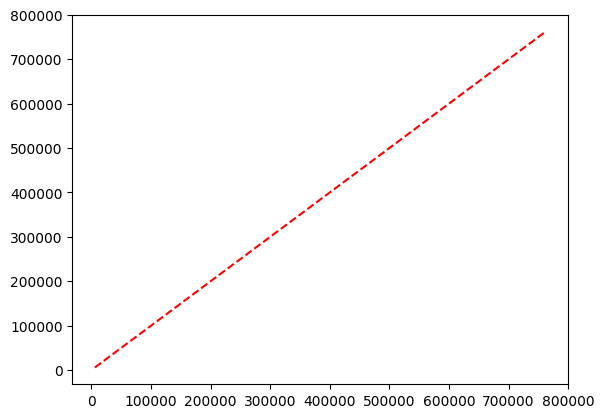

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true, y=y_pred)
plt.title('Actual vs Predicted Resale Prices')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.show()

# Optionally, add a line of perfect prediction (45-degree line)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.show()


In [87]:
df11

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months,year
0,1,1,0,31.0,4,1977,9000.0,11.0,624.0,1990
1,1,1,0,31.0,4,1977,6000.0,5.0,624.0,1990
2,1,1,0,31.0,4,1977,8000.0,11.0,624.0,1990
3,1,1,0,31.0,4,1977,6000.0,8.0,624.0,1990
4,1,1,2,73.0,3,1976,47200.0,5.0,612.0,1990
...,...,...,...,...,...,...,...,...,...,...
941001,11,2,4,112.0,14,2015,700000.0,8.0,1080.0,2024
941002,11,2,4,113.0,14,2017,720000.0,11.0,1102.0,2024
941003,11,2,4,122.0,14,1988,670000.0,2.0,753.0,2024
941004,11,2,5,148.0,23,1988,762500.0,5.0,754.0,2024
